In [1]:
import tensorflow as tf
from tensorflow.keras import Model, losses, layers, Input, callbacks
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np

from model_builder_config2 import build_discriminator, build_generator, MyGan

print(f"Version of tensorflow: {tf.__version__}\n")

Version of tensorflow: 2.9.0



In [2]:
generator = build_generator()
discriminator = build_discriminator()
gan = MyGan(generator, discriminator)

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-05-07 11:17:04.222804: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-07 11:17:04.223275: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
gan.summary()

Model: "my_gan"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Generator (Functional)      (None, 28, 28, 1)         2513584   
                                                                 
 Discriminator (Functional)  (None, 1)                 246481    
                                                                 
Total params: 2,760,065
Trainable params: 2,755,265
Non-trainable params: 4,800
_________________________________________________________________



Model: "Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 h0 (Dense)                  (None, 1200)              121200    
                                                                 
 batch_normalization (Ba

In [4]:
# gen_img = gan.generator(noise)
batch_size = 25
latent_dim = 100
random_latent_vectors = tf.random.normal(shape=(batch_size, latent_dim), mean=0)


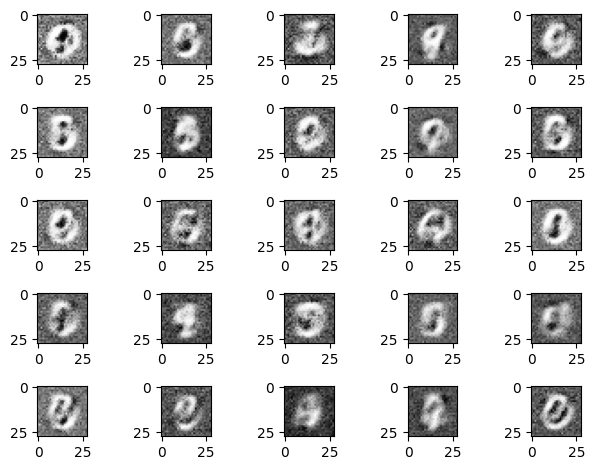

In [5]:
gan.load_weights("./checkpoints/model_best2.h5")
generated_images = generator(random_latent_vectors)
for i in range(batch_size):
    plt.subplot(5,5,i+1)
    plt.imshow(generated_images[i], cmap="gray")
plt.tight_layout()
plt.show()